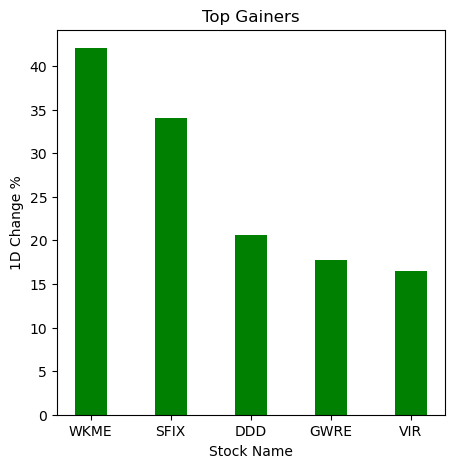

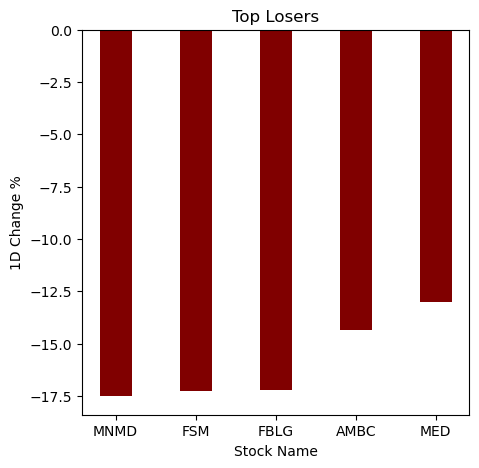

In [96]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import matplotlib.pyplot as plt 

#insert the path for chromedrive to use selenium scripts
CHROMEDRIVER_PATH = 'C://Users//raghu//Downloads//chrome-win64//chrome-win64//chrome.exe'

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("start-maximized")
chrome_options.add_argument("--disable-blink-features")
chrome_options.add_argument("--disable-blink-features=AutomationControlled")

#login details
LOGIN_PAGE = "https://www.seekingalpha.com"
ACCOUNT = "account_user_email" #input your user email
PASSWORD = "Password" #input your email password

#initiating the webdriver
driver = webdriver.Chrome()
driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
driver.execute_cdp_cmd('Network.setUserAgentOverride', {"userAgent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.53 Safari/537.36'})

#website name
driver.get("https://seekingalpha.com")
#elem=driver.find_element(By.XPATH,'//div[@class="vjbAl relative inline-flex cursor-pointer items-center justify-center break-words bg-clip-padding whitespace-nowrap ZcWj4"]')
elem= WebDriverWait(driver, 20).until(
EC.element_to_be_clickable(driver.find_element(By.CSS_SELECTOR,"button[aria-label='Login / Register']")))
#passing the login details
elem.click()
driver.implicitly_wait(20)
driver.switch_to.window(driver.window_handles[-1])
username = WebDriverWait(driver, 20).until(
EC.element_to_be_clickable(driver.find_element(By.NAME,"email")))
username.send_keys(ACCOUNT)
password = WebDriverWait(driver, 10).until(
EC.element_to_be_clickable(driver.find_element(By.NAME,"password")))
#password = driver.find_element_by_name("password")
password.send_keys(PASSWORD)

submit_button = driver.find_element(By.CSS_SELECTOR,"button[data-test-id='sign-in-button']")
submit_button.click()

driver.get("https://seekingalpha.com")

#scraping the market top gainers and top losers from the site

chart_title = driver.find_element(By.CSS_SELECTOR,"h3[class='p-0 text-medium-b text-share-text-3 dark:text-black-30']").text
if (EC.staleness_of(driver.find_element(By.CSS_SELECTOR, "span[class='w-1/4 truncate pr-8 font-bold']"))):
    WebDriverWait(driver, 10).until(EC.staleness_of(driver.find_element(By.CSS_SELECTOR, "span[class='w-1/4 truncate pr-8 font-bold']")))
    finlist_name =[e.text for e in WebDriverWait(driver, 40).until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR, "span[class='w-1/4 truncate pr-8 font-bold']")))]
    finlist_value =[e.text for e in WebDriverWait(driver, 40).until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR, "span[data-test-id='item-value']")))]
   #data-test-id="item-value"
    #span[class='w-1/4 text-right text-teal dark:text-teal-75']
    gain_dict = {}
    losers_dict = {}
    
    #visibility_of_all_elements_located
    for i in range(5):
            gain_dict[finlist_name[i]] = float(finlist_value[i].strip("%\n "))
           
    data = gain_dict
    courses = list(data.keys())
    values = list(data.values())
      
    fig = plt.figure(figsize = (5, 5))
     
    # creating the bar plot
    plt.bar(courses, values, color ='green', 
            width = 0.4)
     
    plt.xlabel("Stock Name")
    plt.ylabel("1D Change %")    
    plt.title(chart_title)
    
    plt.show()
    for i in range(15,20):
            losers_dict[finlist_name[i]] = float(finlist_value[i].strip("%\n "))
           
    data = losers_dict
    courses = list(data.keys())
    values = list(data.values())
      
    fig = plt.figure(figsize = (5, 5))
     
    # creating the bar plot
    plt.bar(courses, values, color ='maroon', 
            width = 0.4)
     
    plt.xlabel("Stock Name")
    plt.ylabel("1D Change %")    
    plt.title("Top Losers")
    
    plt.show()
    driver.close()

